In [1]:
import pandas as pd
import numpy as np

# Load dataset (adjust path/filename as in your Week 1 notebook)
df = pd.read_csv("floods.csv")

# Check shape and first rows
print("Dataset Shape:", df.shape)
df.head()


FileNotFoundError: [Errno 2] No such file or directory: 'floods.csv'

In [2]:
import os
print(os.getcwd())


C:\Users\raja5


In [3]:
# Step 1 – Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


In [4]:
# Load dataset from your path
df = pd.read_csv(r"C:\Users\raja5\OneDrive\Documents\datasets\flood.csv")

# Check dataset shape and first rows
print("Dataset Shape:", df.shape)
df.head()


Dataset Shape: (50000, 21)


MonsoonIntensity  TopographyDrainage  RiverManagement  Deforestation  \
0                 3                   8                6              6   
1                 8                   4                5              7   
2                 3                  10                4              1   
3                 4                   4                2              7   
4                 3                   7                5              2   

   Urbanization  ClimateChange  DamsQuality  Siltation  AgriculturalPractices  \
0             4              4            6          2                      3   
1             7              9            1          5                      5   
2             7              5            4          7                      4   
3             3              4            1          4                      6   
4             5              8            5          2                      7   

   Encroachments  ...  DrainageSystems  CoastalVulnerability  Landslides  \
0              2  ...               10                     7           4   
1              4  ...                9                     2           6   
2              9  ...                7                     4           4   
3              4  ...                4                     2           6   
4              5  ...                7                     6           5   

   Watersheds  DeterioratingInfrastructure  PopulationScore  WetlandLoss  \
0           2                            3                4            3   
1           2                            1                1            9   
2           8                            6                1            8   
3           6                            8                8            6   
4           3                            3                4            4   

   InadequatePlanning  PoliticalFactors  FloodProbability  
0                   2                 6             0.450  
1                   1                 3             0.475  
2                   3                 6             0.515  
3                   6                10             0.520  
4                   3                 4             0.475  

[5 rows x 21 columns]

In [5]:
# Info & summary
df.info()
df.describe()

# Missing values
print(df.isnull().sum())

# Duplicates
print("Duplicates:", df.duplicated().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   MonsoonIntensity                 50000 non-null  int64  
 1   TopographyDrainage               50000 non-null  int64  
 2   RiverManagement                  50000 non-null  int64  
 3   Deforestation                    50000 non-null  int64  
 4   Urbanization                     50000 non-null  int64  
 5   ClimateChange                    50000 non-null  int64  
 6   DamsQuality                      50000 non-null  int64  
 7   Siltation                        50000 non-null  int64  
 8   AgriculturalPractices            50000 non-null  int64  
 9   Encroachments                    50000 non-null  int64  
 10  IneffectiveDisasterPreparedness  50000 non-null  int64  
 11  DrainageSystems                  50000 non-null  int64  
 12  CoastalVulnerabili

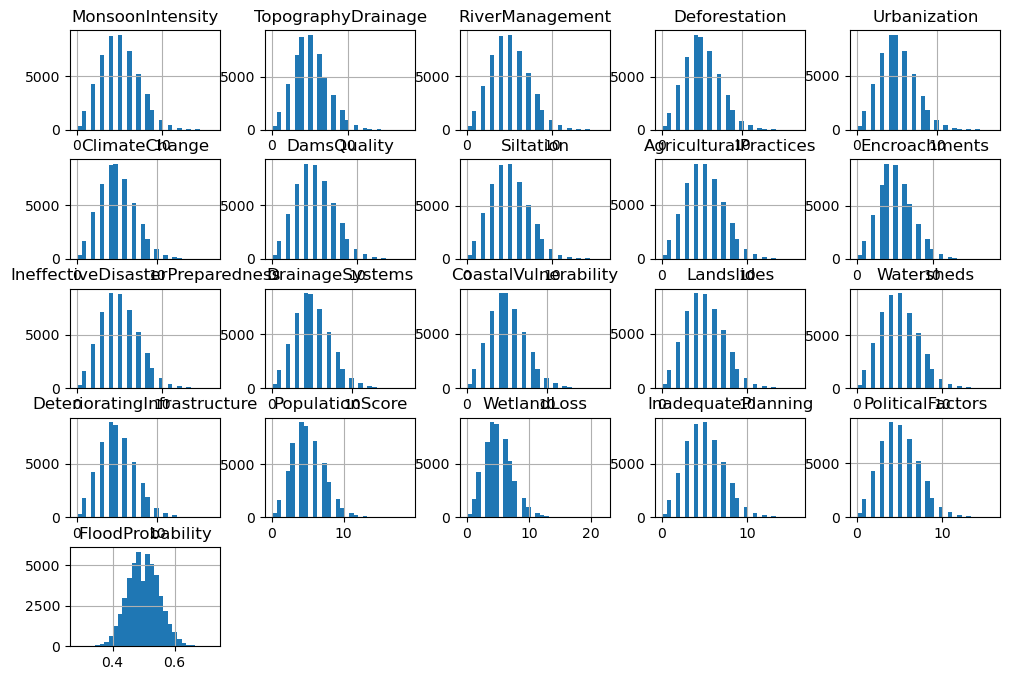

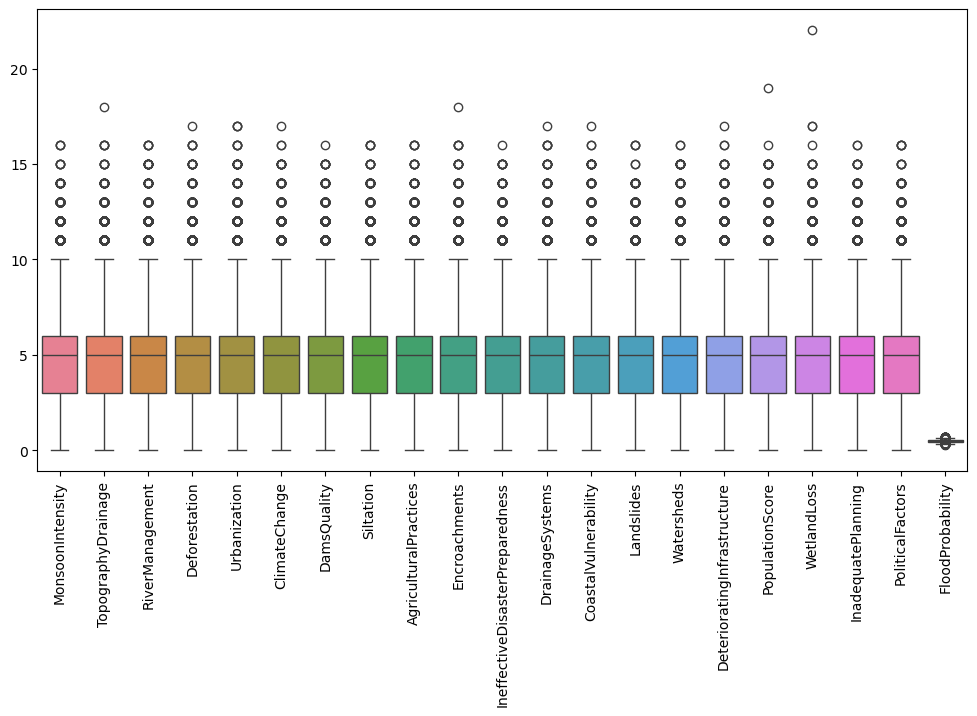

In [6]:
# Histograms
df.hist(figsize=(12, 8), bins=30)
plt.show()

# Boxplots for outlier detection
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

# Value counts for categorical features
for col in df.select_dtypes(include=['object']).columns:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts())


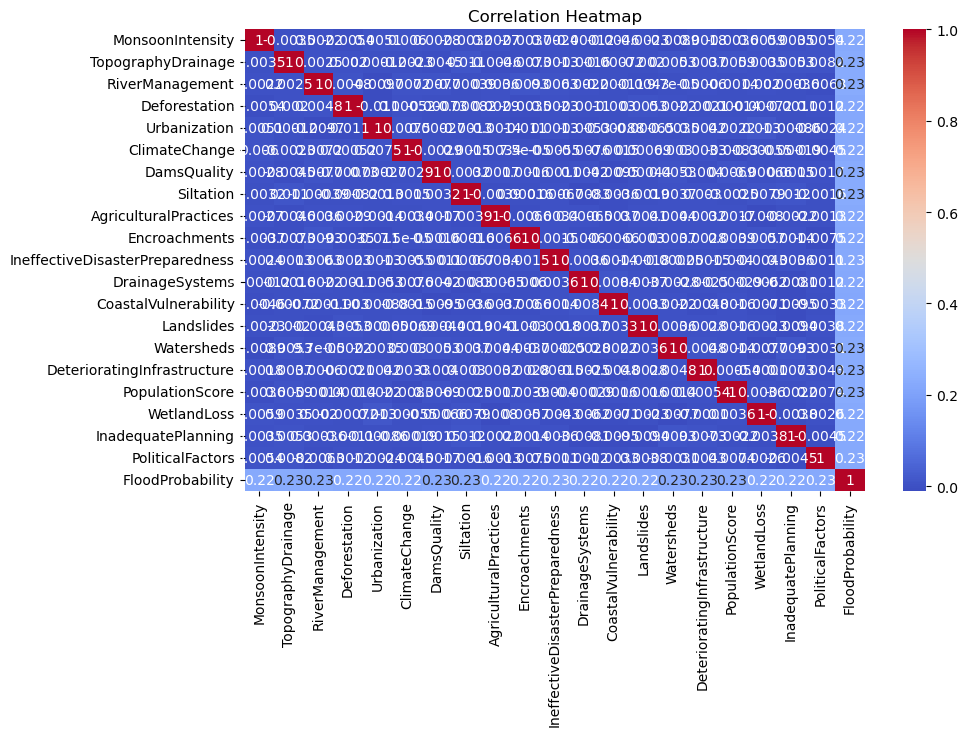

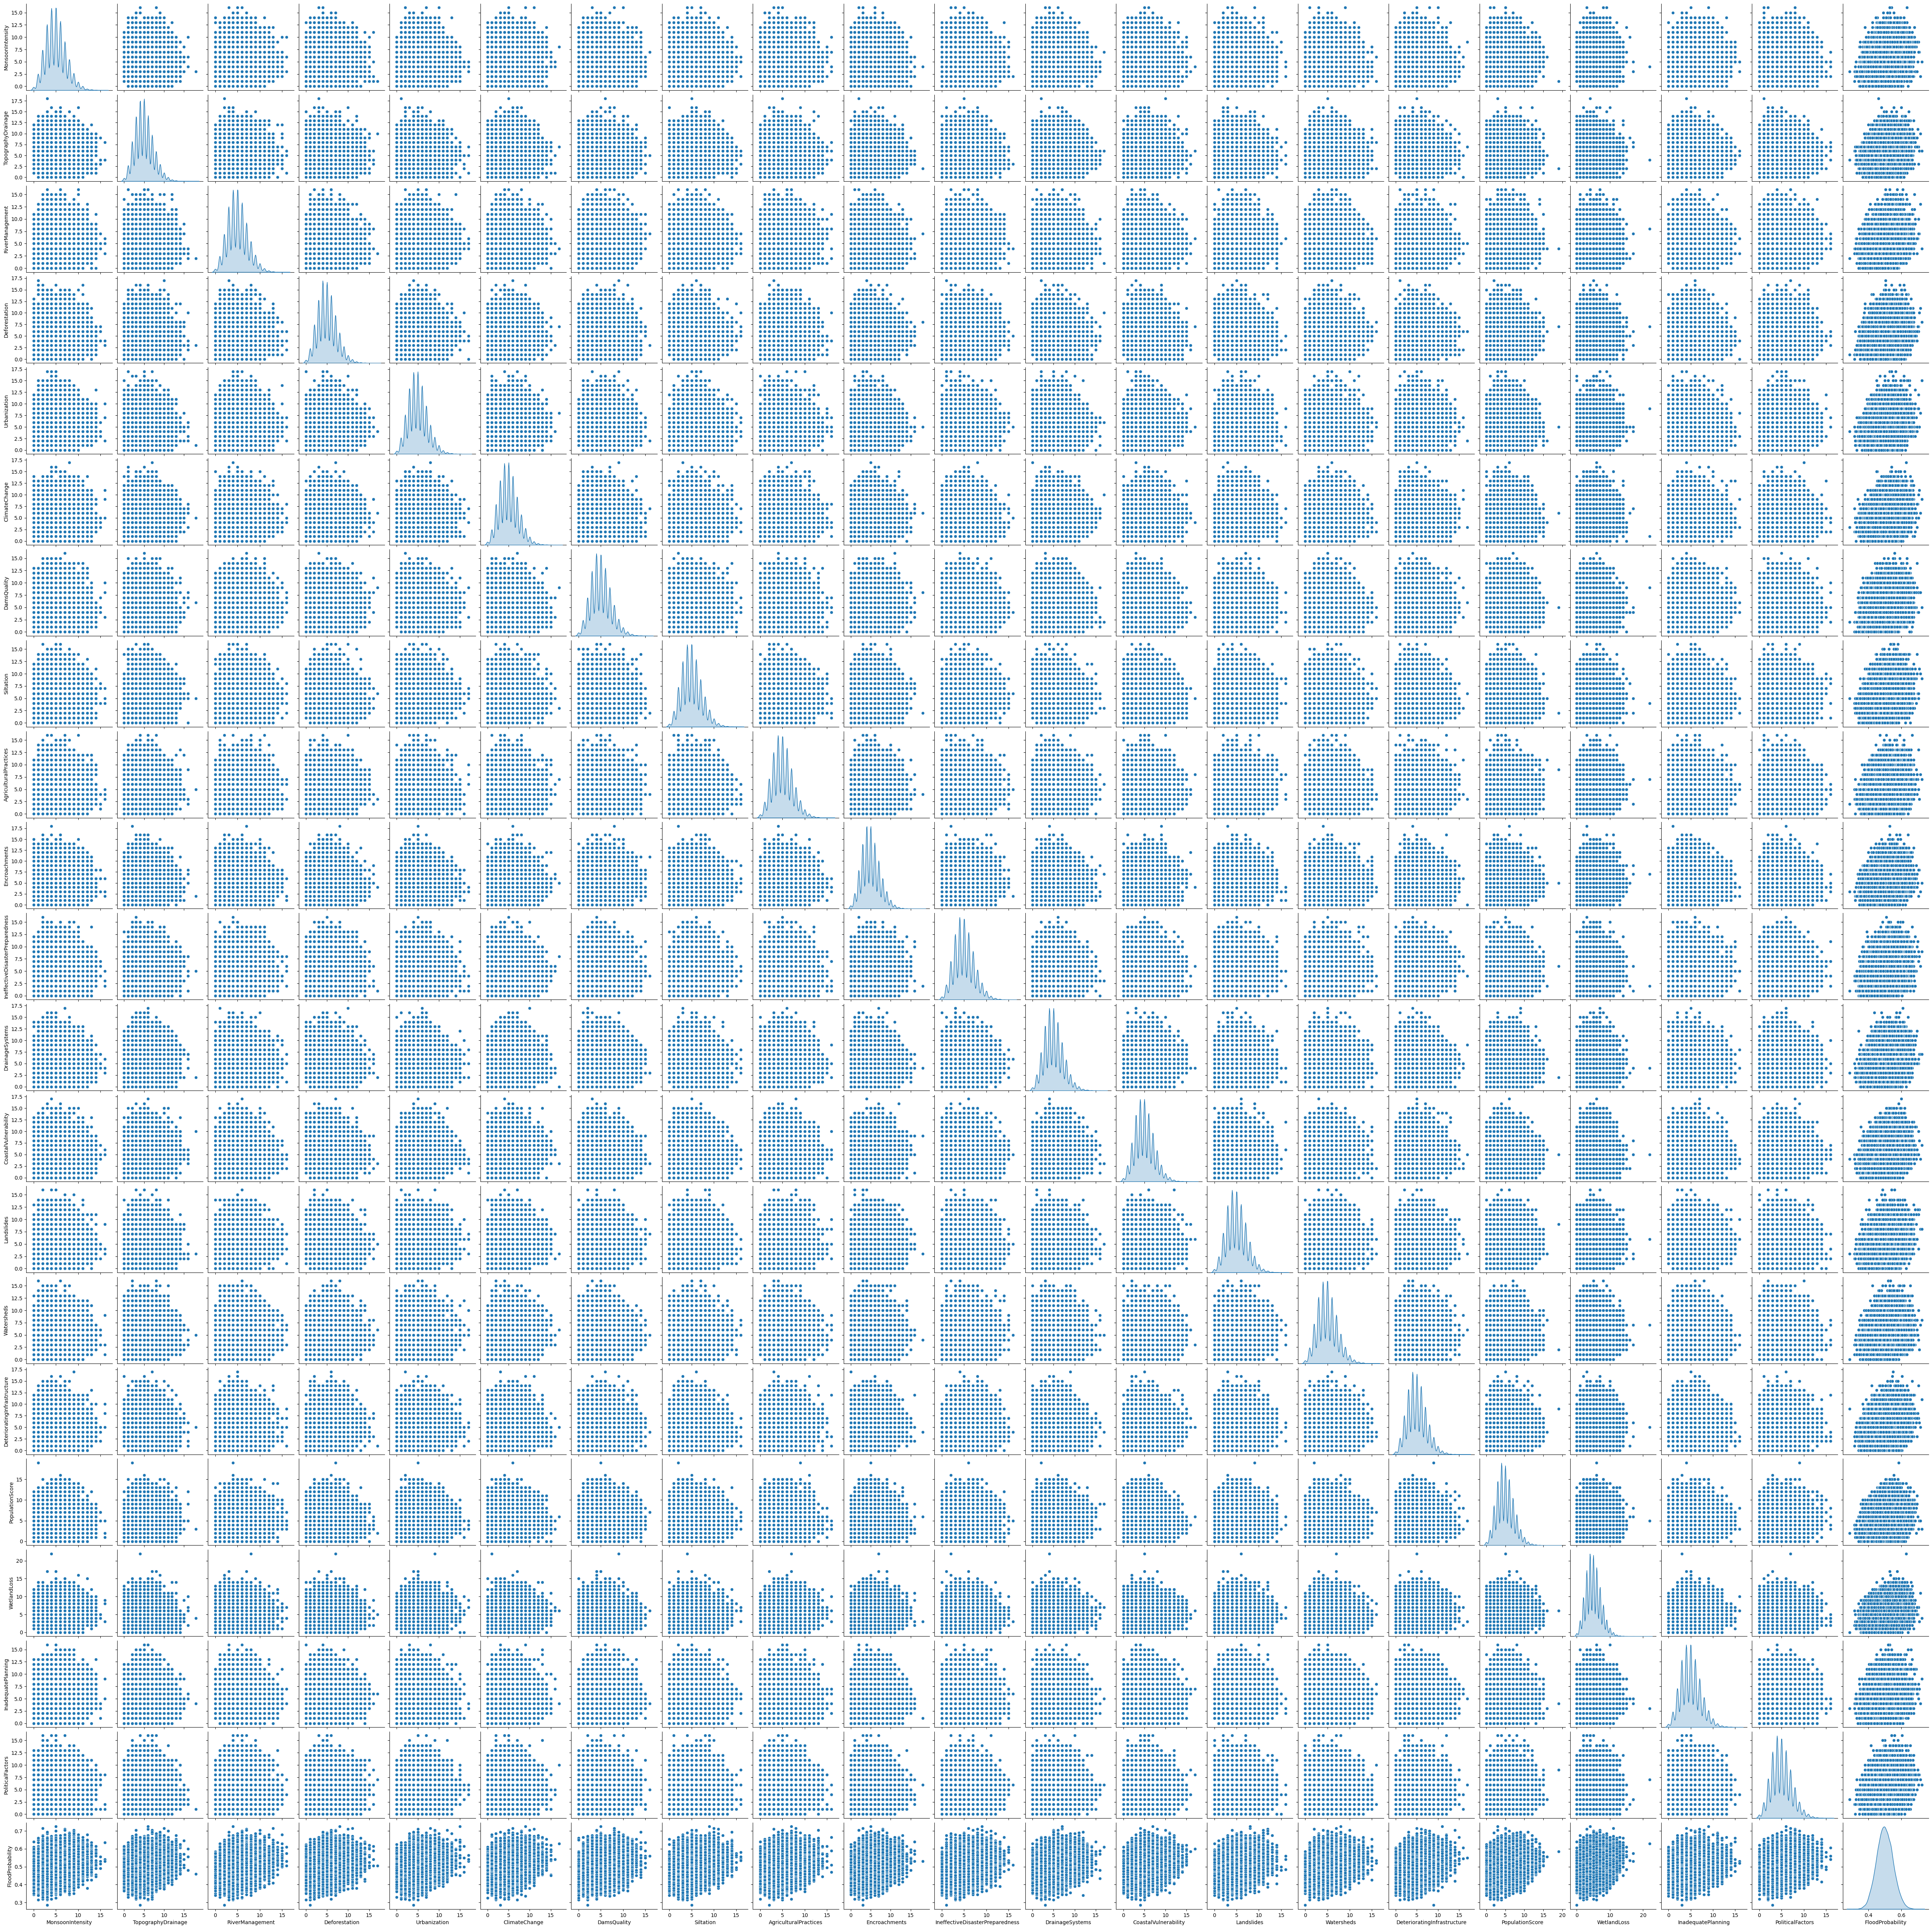

In [7]:
# Correlation heatmap (numerical only)
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Pairplot (can be slow if dataset is large)
sns.pairplot(df, diag_kind="kde")
plt.show()


In [ ]:
print("Numeric Columns:", df.select_dtypes(include=['int64','float64']).columns.tolist())
print("Categorical Columns:", df.select_dtypes(include=['object']).columns.tolist())


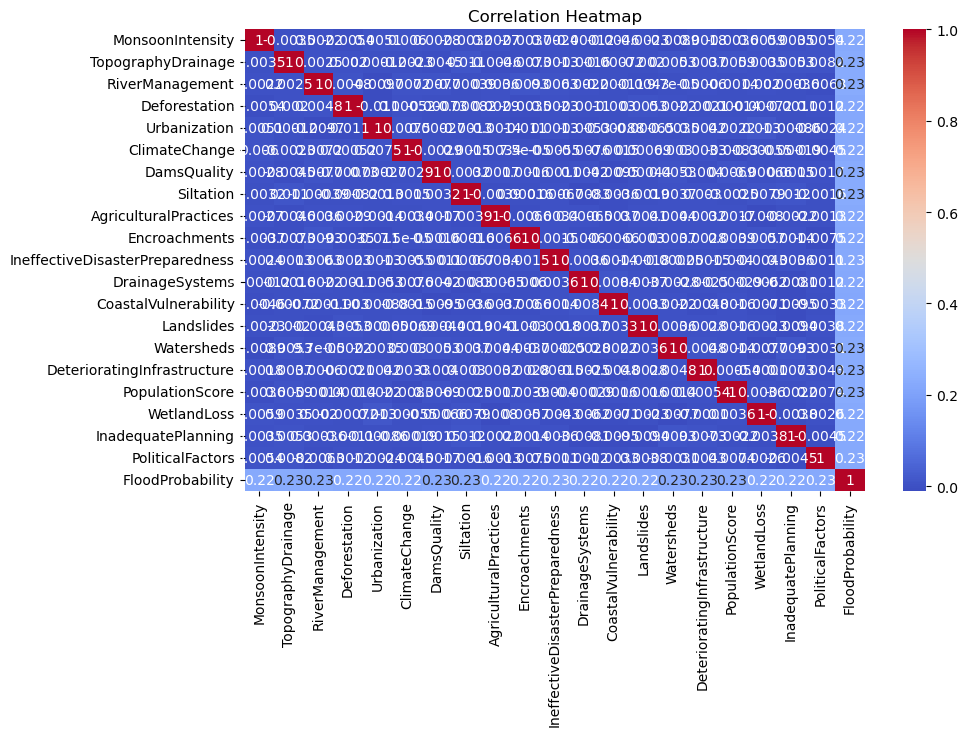

In [12]:
if len(df.select_dtypes(include=['int64','float64']).columns) > 1:
    plt.figure(figsize=(10, 6))
    sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
    plt.title("Correlation Heatmap")
    plt.show()


In [17]:
import os

path = r"C:\Users\raja5\OneDrive\Documents\datasets\flood.csv"
print("File exists:", os.path.exists(path))
print("File size:", os.path.getsize(path), "bytes")


File exists: True
File size: 2354496 bytes


In [18]:
import os
print("File size:", os.path.getsize(r"C:\Users\raja5\OneDrive\Documents\datasets\flood.csv"), "bytes")


File size: 2354496 bytes


In [19]:
with open(r"C:\Users\raja5\OneDrive\Documents\datasets\flood.csv", "r", encoding="utf-8") as f:
    for i in range(10):
        print(f.readline())


MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability

3,8,6,6,4,4,6,2,3,2,5,10,7,4,2,3,4,3,2,6,0.45

8,4,5,7,7,9,1,5,5,4,6,9,2,6,2,1,1,9,1,3,0.475

3,10,4,1,7,5,4,7,4,9,2,7,4,4,8,6,1,8,3,6,0.515

4,4,2,7,3,4,1,4,6,4,9,4,2,6,6,8,8,6,6,10,0.52

3,7,5,2,5,8,5,2,7,5,7,7,6,5,3,3,4,4,3,4,0.475

6,6,6,4,6,4,3,1,3,5,1,10,5,9,5,5,7,3,3,2,0.47

6,7,4,5,5,5,4,8,8,4,6,8,4,5,4,7,7,5,4,8,0.57

7,3,5,5,6,6,6,7,6,5,5,4,6,9,7,10,6,5,4,5,0.585

6,3,5,4,5,11,3,2,9,7,8,2,8,7,5,4,9,6,5,7,0.58



In [20]:
print(df.info())
print(df.describe())
print("Missing values:\n", df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   MonsoonIntensity                 50000 non-null  float64
 1   TopographyDrainage               50000 non-null  float64
 2   RiverManagement                  50000 non-null  float64
 3   Deforestation                    50000 non-null  float64
 4   Urbanization                     50000 non-null  float64
 5   ClimateChange                    50000 non-null  float64
 6   DamsQuality                      50000 non-null  float64
 7   Siltation                        50000 non-null  float64
 8   AgriculturalPractices            50000 non-null  float64
 9   Encroachments                    50000 non-null  float64
 10  IneffectiveDisasterPreparedness  50000 non-null  float64
 11  DrainageSystems                  50000 non-null  float64
 12  CoastalVulnerabili

In [21]:
numeric_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print("Numeric Columns:", numeric_cols)
print("Categorical Columns:", categorical_cols)


Numeric Columns: ['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement', 'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality', 'Siltation', 'AgriculturalPractices', 'Encroachments', 'IneffectiveDisasterPreparedness', 'DrainageSystems', 'CoastalVulnerability', 'Landslides', 'Watersheds', 'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss', 'InadequatePlanning', 'PoliticalFactors', 'FloodProbability']
Categorical Columns: []


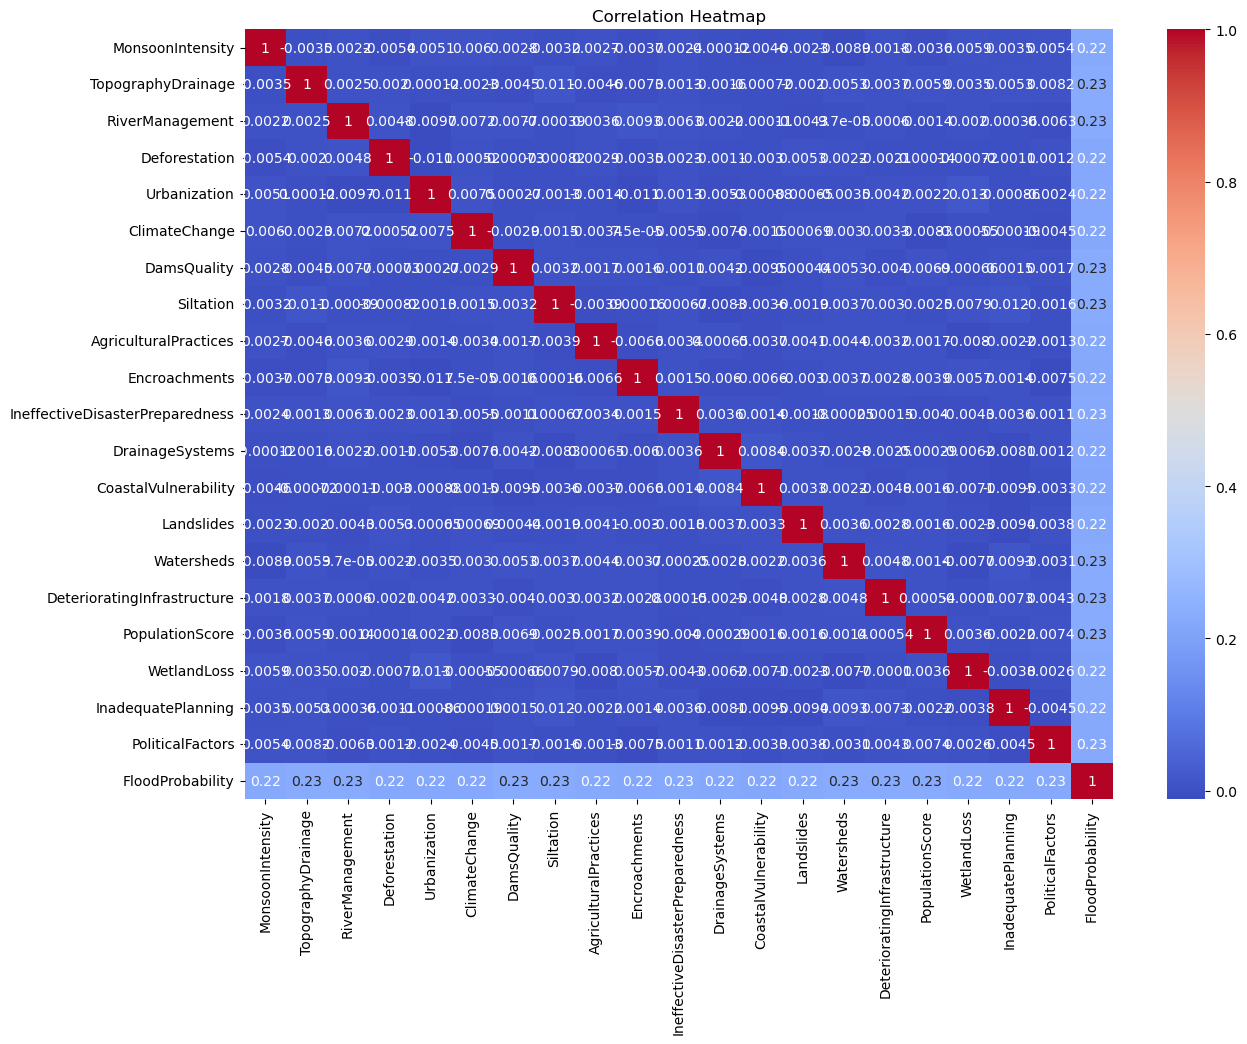

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


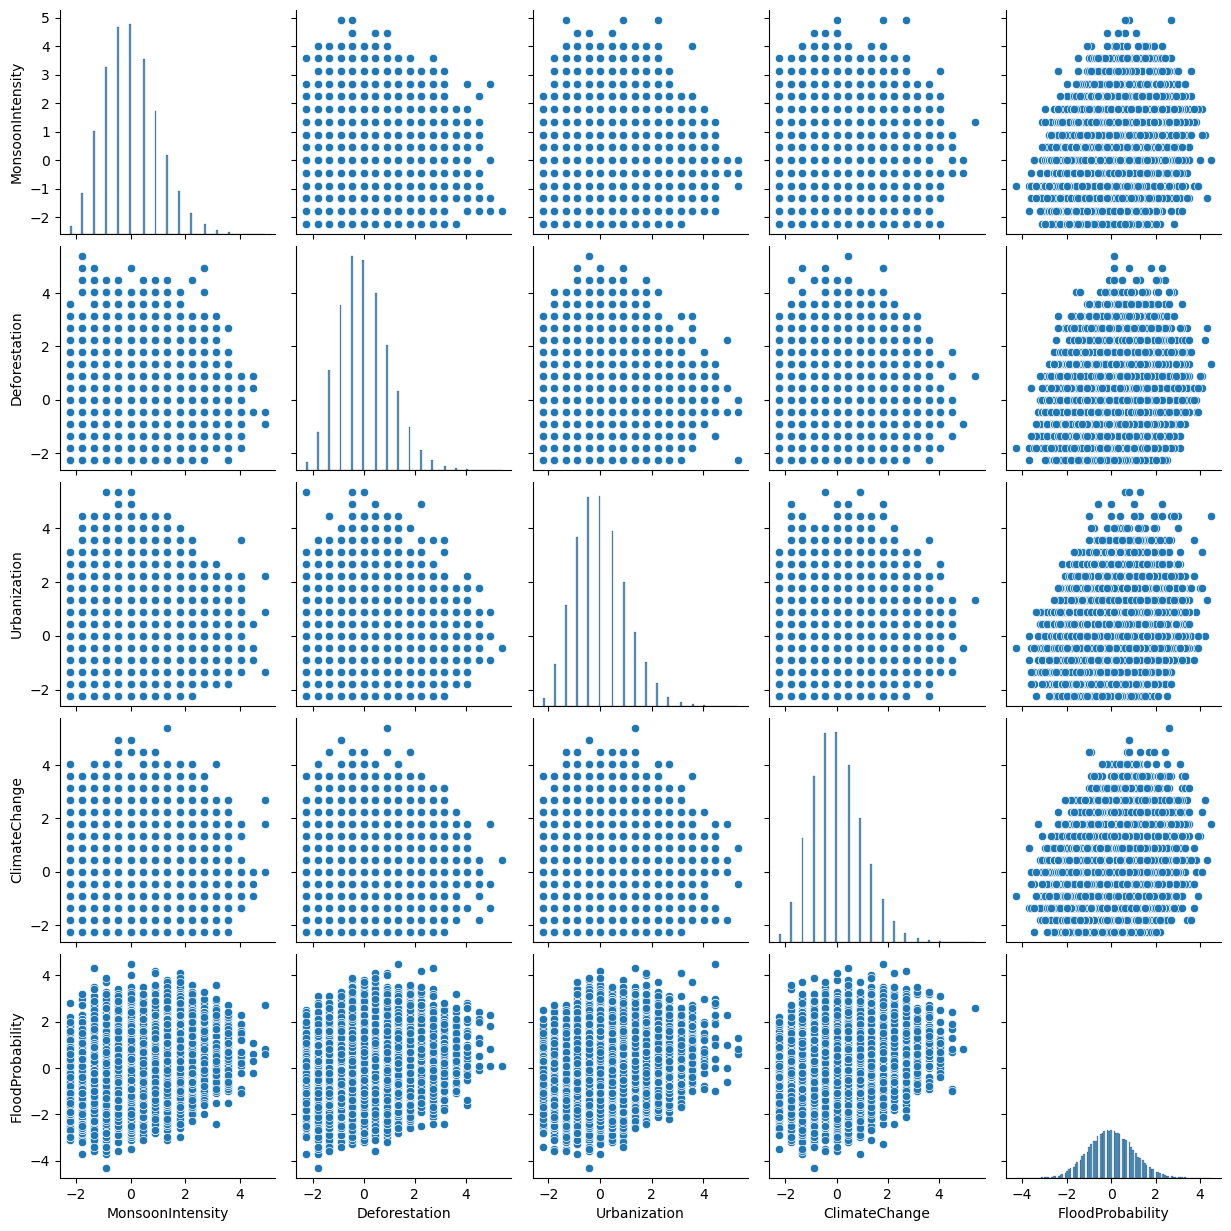

In [24]:
sns.pairplot(df[['MonsoonIntensity','Deforestation','Urbanization','ClimateChange','FloodProbability']])
plt.show()


In [32]:
from sklearn.ensemble import RandomForestRegressor

X = df.drop("FloodProbability", axis=1)
y = df["FloodProbability"]

model = RandomForestRegressor(random_state=42)
model.fit(X, y)

print("Model trained successfully")


Model trained successfully


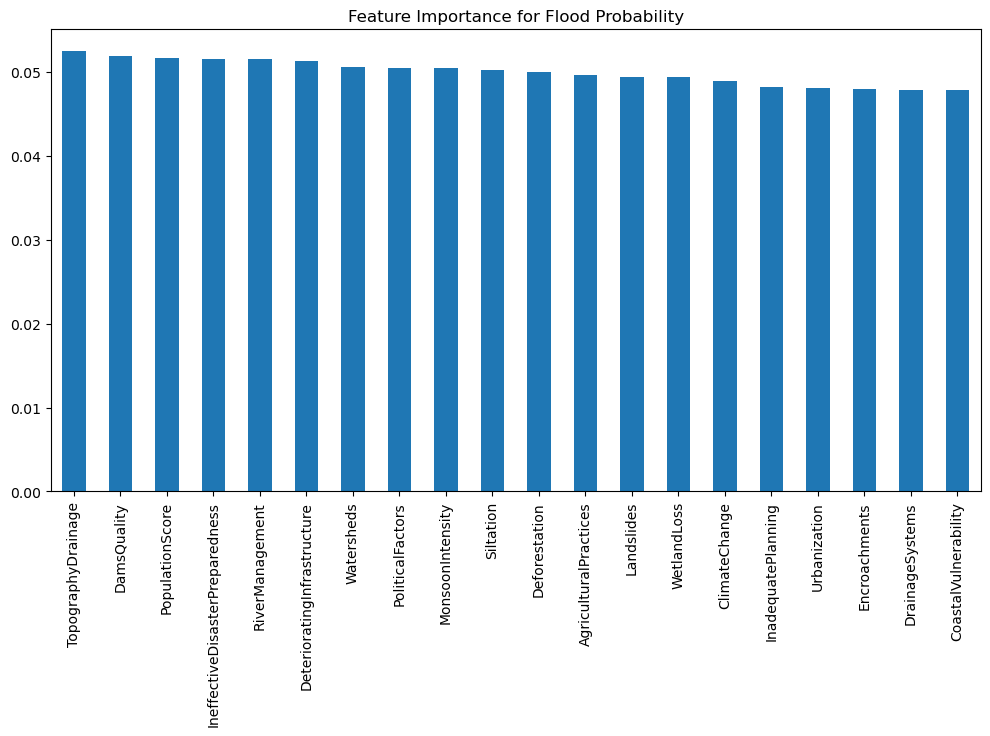

In [38]:
from sklearn.ensemble import RandomForestRegressor

X = df.drop("FloodProbability", axis=1)
y = df["FloodProbability"]

model = RandomForestRegressor(random_state=42)
model.fit(X, y)

importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).plot(kind="bar", figsize=(12,6))
plt.title("Feature Importance for Flood Probability")
plt.show()
